# Predicting Sales Prices

 ## Exploration of all independent variables for comparison


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices for comparison with the model produced based obly on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [10]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [11]:
# Read in the data set
data = pd.read_csv("ames.csv")

In [12]:
# Split the independent variables from the dependent variable using Gr_Liv_Area and Garage_Area
X = data.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]].values

In [13]:
# Build a multiple linear regression model
# Select and reshape data
y = data.iloc[:,13].values
y = y.reshape(-1, 1)
X = X.reshape(-1, X.shape[1])

# Create an empty linear regression model
sales_model = LinearRegression()

# Create the model using fit(X,y)
sales_model.fit(X,y)

LinearRegression()

In [14]:
# Create a training and test set with a 75:25 split ratio
rseed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,  random_state=rseed, shuffle=True,)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)

Training data: (2197, 13) (2197, 1)
Test data: (733, 13) (733, 1)


In [15]:
# Standardise data
# Fit the scaler on training set
sc = MinMaxScaler()
sc.fit(X_train)

# Apply the scaler on train and test data
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Fit a linear regression model
lr = LinearRegression()
model = lr.fit(X_train, y_train)

In [16]:
# Generate predictions for the test set
predictions = lr.predict(X_test)

# Create line coordinates
X_line = np.empty(X_test.shape)
for i in range(X_test.shape[1]):
    X_line[:, i] = np.linspace(np.min(X_test[:,i]), np.max(X_test[:,i]), num=X_test.shape[0])
y_line = lr.predict(X_line)

In [17]:
# Evaluate the model
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE): $", round(rmse, 2))

print(f"\nRMSE as a percent of the average: {round((rmse/180796.06)*100)}%")
print(f"\nRMSE vs. standard deviation: {round((rmse/79886.69)*100)}%")


Root Mean Squared Error (RMSE): $ 38362.19

RMSE as a percent of the average: 21%

RMSE vs. standard deviation: 48%


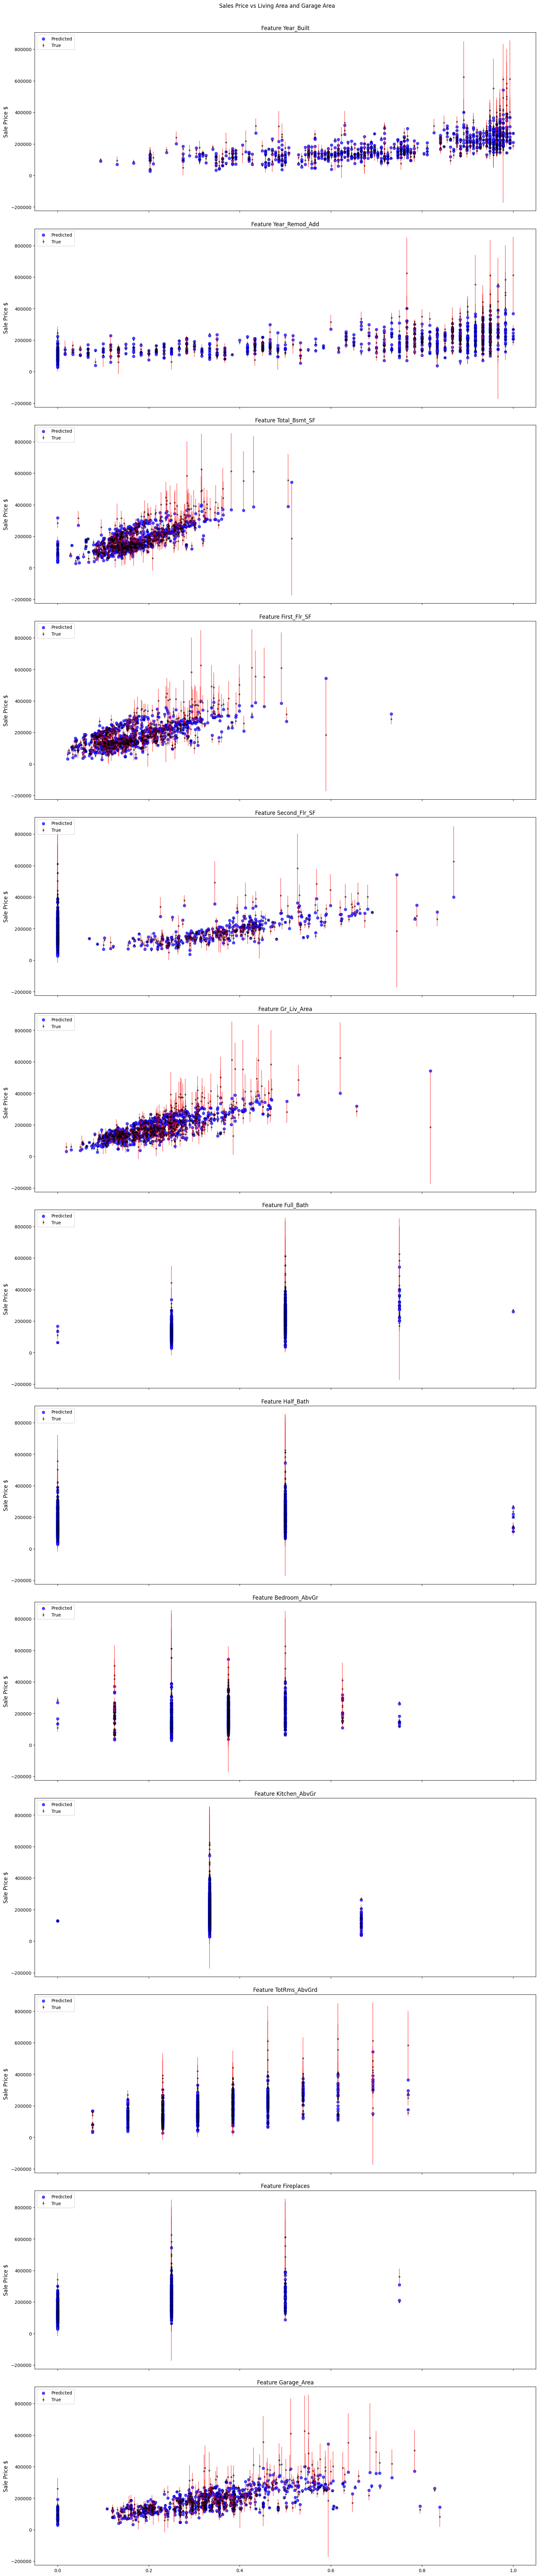

In [18]:
# Generate a plot
num_features = X_test.shape[1]

# Set plots per row
rows = (num_features // 1) + (num_features % 1 > 0)
cols = 1

fig, ax = plt.subplots(rows, cols, figsize=(20, rows * 7), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.1, wspace=0.1, top=0.97)
fig.suptitle("Sales Price vs Living Area and Garage Area")

# Flatten the axes array for iteration
ax = ax.flatten()

# Get values for the error bar
error_bar_values = np.abs((y_test - predictions)[:, 0])

# Plot data, predicted values, and error bars
for i in range(num_features):
    ax[i].errorbar(X_test[:, i], y_test[:, 0], yerr=error_bar_values, fmt='.k', ecolor='red', alpha=0.5, label='True')
    ax[i].scatter(X_test[:, i], predictions[:, 0], c='b', alpha=0.7, marker='o', label='Predicted')
    ax[i].set_ylabel("Sale Price $", fontsize=12)
    ax[i].legend(loc='upper left', fontsize=10)
    ax[i].set_title(f"Feature {data.columns[i]}")

# Hide any unused subplots
for j in range(i + 1, len(ax)):
    ax[j].axis('off')

plt.show()